<a href="https://colab.research.google.com/github/myh233/gitTUT/blob/master/My_First_Model(%E6%91%84%E6%B0%8F%E5%BA%A6%E8%BD%AC%E5%8D%8E%E6%B0%8F%E5%BA%A6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 导入TensorFlow and NumPy

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR) #告诉TensorFlow只记录错误消息

import numpy as np

In [0]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} 摄氏度 = {} 华氏度".format(c,fahrenheit_a[i]))

-40.0 摄氏度 = -40.0 华氏度
-10.0 摄氏度 = 14.0 华氏度
0.0 摄氏度 = 32.0 华氏度
8.0 摄氏度 = 46.0 华氏度
15.0 摄氏度 = 59.0 华氏度
22.0 摄氏度 = 72.0 华氏度
38.0 摄氏度 = 100.0 华氏度


### Some Machine Learning terminology（一些机器学习术语）
 - **Feature(特征)** — The input(s) to our model. In this case, a single value — the degrees in Celsius(摄氏度).

 - **Labels(标签)** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit(华氏度).
 
 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`

### Create the model(创造模型)
Next create the model. We will use simplest possible model we can, a Dense network(一个密集的网络). Since the problem is straightforward(简单的), this network will require only a single layer(单层), with a single neuron(单个神经元). 

layer:神经元的层

### Build a layer(建一个层)

We'll call the layer `layer1` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value(这指定该层的输入为单个值). That is, the shape is a one-dimensional array with one member(也就是说，这个shape是一个一维数组，只有一个元素). Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

In [0]:
layer1 = tf.keras.layers.Dense(units=1, input_shape=[1])
#layer1为layer即该层的名字，units指定了这个层级将有多少内部变量

### Assemble layers into the model(将各层组装到模型中)
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.
(一旦定义了层，就需要将它们组装到模型中。序列模型定义以一组层作为参数，指定从输入到输出的计算顺序。
这个模型只有一个单层，layer1)

In [0]:
model = tf.keras.Sequential([layer1])

**Note(另一种创造层以及组装到模型的方法)**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

### Compile the model(编译模型), with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function(损失函数)** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)(一种衡量预测与预期结果之间距离的方法)
在每次迭代过程中衡量模型好坏的函数称为“损失函数”，每次调整的目标是“最小化损失函数”。
- **Optimizer function(优化器)** — A way of adjusting internal values in order to reduce the loss(一种调整内部值以减少损失的方法).

- **TensorFlow**在训练中使用损失函数和优化器来寻找最佳模型

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))#Adam优化器
#mean_squared_error(均方误差)
#Adam优化器，这里的0.1称为学习速率(0.1-0.001之间)

### Train the model(训练模型)
Train the model by calling the `fit` method(通过调用model的fit方法). 

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs(第一个参数是输入), the second argument is the desired outputs(第二个参数是期望的输出). The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.One epoch is a full iteration of the examples we have seen(一个周期是指对我们看到的样本进行一次完整的迭代，本例中一共有七个样本，一次迭代将训练7个样本).


In [0]:
history1 = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
#epochs参数指定这个循环应该运行多少次，verbose参数控制方法产生多少输出
#我们一共有7个摄氏度-华氏度映射样本，所以模型一共将训练500*7=3500个样本

Finished training the model


### Display training statistics(显示训练的统计数据)
The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`. 

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

fit方法返回一个history对象。我们可以使用这个对象来绘制我们的模型在每个训练周期之后的损失是如何下降的。高损耗意味着模型预测的华氏温度远低于华氏温度的对应值。
我们将使用Matplotlib将其可视化(您可以使用另一个工具)。正如您所看到的，我们的模型一开始改进得非常快，然后有一个稳定的、缓慢的改进，直到接近“完美”为止。

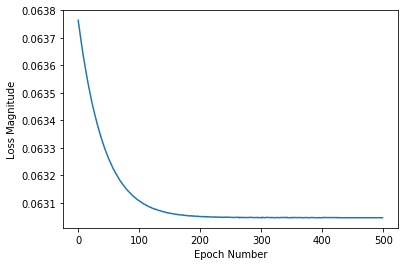

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history1.history['loss'])

### Use the model to predict values(用模型来预测一些值)

In [0]:
print(model.predict([100.0]))

[[211.74744]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review(回顾)


*   We created a model with a Dense laye(密集层)
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

我们的模型调整了密集层中的变量(权重)，直到它能够返回任何摄氏度的正确华氏值。(记住，100摄氏度不是我们训练数据的一部分。)

### Looking at the layer weights

Finally, let's print the internal variables(内部变量) of the Dense layer. 

之前的公式是：华氏度=1.8*摄氏度 +32

In [0]:
print("These are the layer variables: {}".format(layer1.get_weights()))

These are the layer variables: [array([[1.7979496]], dtype=float32), array([31.952477], dtype=float32)]


### A little experiment(一个小尝试)

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?(如果我们用不同的units创建更密集的层会怎样?)

In [0]:
#建造层
layer1 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer2 = tf.keras.layers.Dense(units=4)  
layer3 = tf.keras.layers.Dense(units=1)  #units指定了这个层级将有多少内部变量
#将各层组装到模型中
model = tf.keras.Sequential([layer1, layer2, layer3])
#编译模型
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
#训练模型
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
#使用模型进行预测
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the layer1 variables: {}".format(layer1.get_weights()))
print("These are the layer2 variables: {}".format(layer2.get_weights()))
print("These are the layer3 variables: {}".format(layer3.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the layer1 variables: [array([[ 0.3063273 , -0.5380941 , -0.42691758,  0.06389692]],
      dtype=float32), array([-1.2932868, -3.4025347, -3.4261405, -2.6540382], dtype=float32)]
These are the layer2 variables: [array([[ 0.42099327,  0.1487053 ,  0.02881597, -0.94457555],
       [ 0.631018  , -0.6140325 ,  0.81398344, -1.4333494 ],
       [ 0.32621858, -0.57941675,  0.7481062 , -1.2644941 ],
       [ 0.36339658, -1.1782414 ,  0.8338976 , -0.08310834]],
      dtype=float32), array([-0.49771434,  3.6327891 , -3.6530952 ,  2.8846815 ], dtype=float32)]
These are the layer3 variables: [array([[-0.11503559],
       [ 0.93307686],
       [-0.7620561 ],
       [ 0.70753974]], dtype=float32), array([3.2762382], dtype=float32)]


# 本节完整代码如下：

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np

celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict([100.0])

array([[211.33835]], dtype=float32)

# 小结

训练流程以前向传播开始，在此流程中，我们将输入数据提供给神经网络（请参见图 1）然后，模型将内部数学运算应用到输入和内部变量上，从而预测答案（在图 1 中，“模型预测出一个值”）。

在我们的示例中，输入是摄氏度数，模型预测出相应的华氏度数。

![替代文字](https://s3.cn-north-1.amazonaws.com.cn/u-img/efabce2c-75ab-427c-bd58-76e7c34b2121)
>>>>>>>>>>>图1.前向传播


预测出一个值后，模型将计算预测值与正确值之间的差值。这个差值称为损失，用于衡量模型执行映射任务的效果。我们使用损失函数计算损失，并且在调用 model.compile() 时通过损失参数指定损失函数。

计算损失后，模型将调整所有层级的内部变量（权重和偏差），从而最小化该损失，使输出值更接近正确值（请参见图 2）

![替代文字](https://s3.cn-north-1.amazonaws.com.cn/u-img/f8e4f660-1a6f-49e6-853c-491f5d1df8cd)
>>>>>>>>>>>图2.反向传播

这个优化流程称为梯度下降法。我们会通过一个具体算法计算每个内部变量的新值，并且在调用 model.compile(...) 时用优化器参数指定该算法。在此示例中，我们使用的是 Adam 优化器。

### 基本属于的含义：
- **特征**：模型的输入
- **样本**：用于训练流程的输入/输出对
- **标签**：模型的输出
- **层级**：神经网络中相互连接的节点集合。
- **模型**：神经网络的表示法
- **密集全连接层 (FC)**：一个层级中的每个节点都与上个层级中的每个节点相连。
- **权重和偏差**：模型的内部变量
- **损失**：期望输出和真实输出之间的差值
- **MSE**：均方误差，一种损失函数，它会将一小部分很大的差值视作比大量很小的差值更糟糕。
- **梯度下降法**：每次小幅调整内部变量，从而逐渐降低损失函数的算法。
- **优化器**：梯度下降法的一种具体实现方法。（有很多算法。在这门课程中，我们将仅使用“Adam”优化器，它是 ADAptive with Momentum 的简称，并且被视为最佳优化器。）
- **学习速率**：梯度下降过程中的损失改进“步长”。
- **批次**：在训练神经网络的过程中使用的一组样本。
- **周期**：完全经过整个训练数据集一轮
- **前向传播**：根据输入计算输出值
- **反向传播**：根据优化器算法计算内部变量的调整幅度，从输出层级开始，并往回计算每个层级，直到抵达输入层。